In [1]:
# Fuel type is a categorial column.
# All coumn have no null value

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [4]:
ToyotaCorolla = df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [6]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


# EDA

In [7]:
df.isnull().sum() # There is nomissing values

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
df[df.duplicated()]  # There is one duplicate record

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [10]:
df.drop_duplicates(ignore_index=True)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


## Box Plot

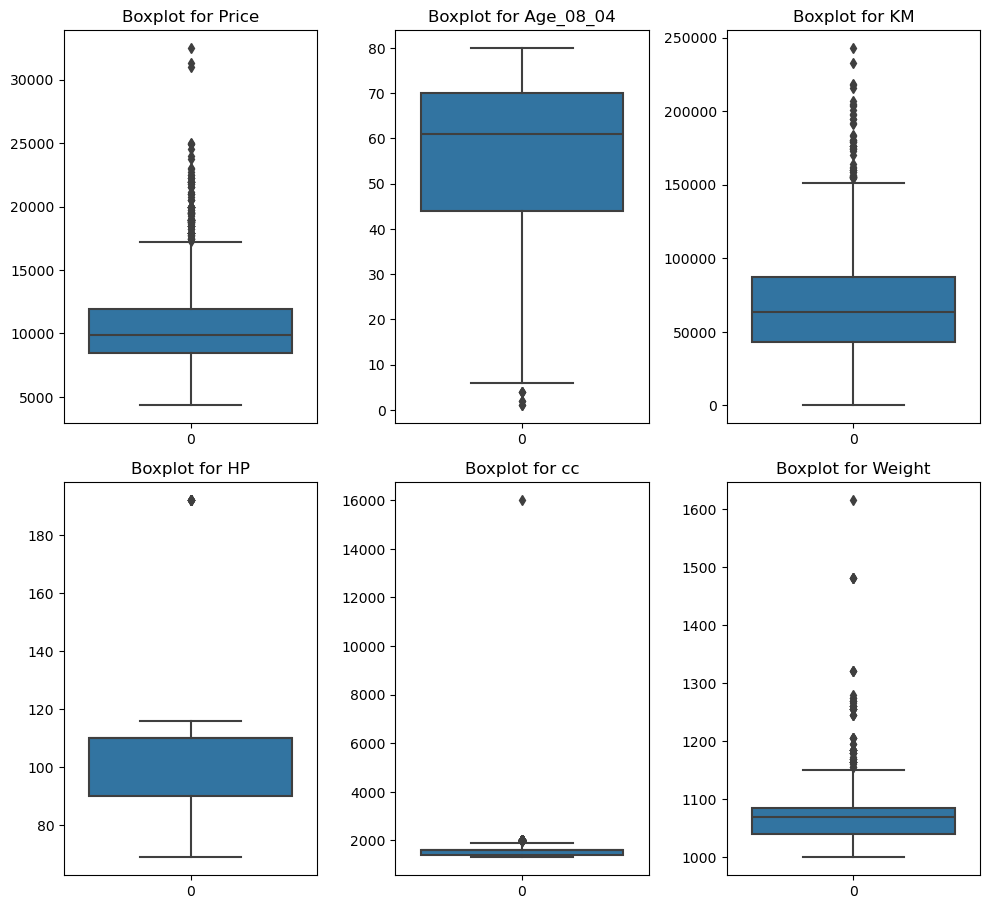

In [11]:
import matplotlib.pyplot as plt

nume_df = df[["Price","Age_08_04","KM","HP","cc","Weight"]]

fig,axs=plt.subplots(nrows=4,ncols=3,figsize=(10,18))

axs = axs.flatten()

# Plot boxplots for each column in the DataFrame
for i, column in enumerate(nume_df.columns):
    sns.boxplot(nume_df[column], ax=axs[i])
    axs[i].set_title(f'Boxplot for {column}')

# Remove any unused subplots
for i in range(len(nume_df.columns), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


## Outlier removing from cc column

<function matplotlib.pyplot.show(close=None, block=None)>

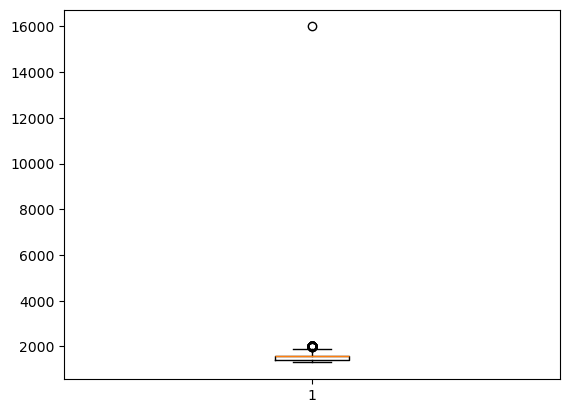

In [12]:
import matplotlib.pyplot as plt
box = plt.boxplot(df["cc"])
plt.show   # Remove Outlier

In [13]:
# Finding IQR     #Quantile = percentile
Qntile_25_cc = df["cc"].quantile(0.25)
Qntile_75_cc = df["cc"].quantile(0.75)

IQR_cc = Qntile_75_cc- Qntile_25_cc
IQR_cc

upper_lim_cc = Qntile_75_cc + (1.5*IQR_cc)
lower_lim_cc = Qntile_25_cc - (1.5*IQR_cc)
print("Upper limit for cc",upper_lim_cc)
print("Lower limit for cc",lower_lim_cc)


df = df[(df.cc < 10000)]
df


Upper limit for cc 1900.0
Lower limit for cc 1100.0


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [14]:
print(df.shape)
df.drop_duplicates(ignore_index=True).tail(2)

(1435, 11)


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1432,7250,70,16916,Petrol,86,0,1300,3,4,5,1015
1433,6950,76,1,Petrol,110,0,1600,5,4,5,1114


In [15]:
df["Cylinders"].unique()

array([4], dtype=int64)

In [16]:
df_1 = df.copy()

## EDA Done

### Speration of dependent and Independent variable

In [17]:
y = df["Price"]
x = df.iloc[:,1:]

In [18]:
x.head(2)

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,Diesel,90,0,2000,3,4,5,1165
1,23,72937,Diesel,90,0,2000,3,4,5,1165


In [19]:
y.head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

### Labeling

In [20]:
from sklearn.preprocessing import LabelEncoder
df["Fuel_Type"].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [21]:
labeling = LabelEncoder()
x["Fuel_Type"]= labeling.fit_transform(x["Fuel_Type"])
x

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,1,90,0,2000,3,4,5,1165
1,23,72937,1,90,0,2000,3,4,5,1165
2,24,41711,1,90,0,2000,3,4,5,1165
3,26,48000,1,90,0,2000,3,4,5,1165
4,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,2,86,0,1300,3,4,5,1025
1432,72,19000,2,86,0,1300,3,4,5,1015
1433,71,17016,2,86,0,1300,3,4,5,1015
1434,70,16916,2,86,0,1300,3,4,5,1015


### Scalling

In [22]:
from sklearn.preprocessing import StandardScaler
scalling = StandardScaler()

In [23]:
x_new = scalling.fit_transform(x)
x_new
x_scale = x_new.copy()

In [24]:
x_new  =  pd.DataFrame(x_new)

In [25]:
x_new.columns = x.columns
x_new

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,-1.774222,-0.575732,-2.336909,-0.767465,-0.24137,2.314319,-1.084443,0.0,-0.140475,1.761938
1,-1.774222,0.116580,-2.336909,-0.767465,-0.24137,2.314319,-1.084443,0.0,-0.140475,1.761938
2,-1.720407,-0.716457,-2.336909,-0.767465,-0.24137,2.314319,-1.084443,0.0,-0.140475,1.761938
3,-1.612776,-0.548681,-2.336909,-0.767465,-0.24137,2.314319,-1.084443,0.0,-0.140475,1.761938
4,-1.397514,-0.802119,-2.336909,-0.767465,-0.24137,2.314319,-1.084443,0.0,-0.140475,1.857059
...,...,...,...,...,...,...,...,...,...,...
1430,0.701288,-1.281143,0.354475,-1.034499,-0.24137,-1.425389,-1.084443,0.0,-0.140475,-0.901458
1431,0.862735,-1.322333,0.354475,-1.034499,-0.24137,-1.425389,-1.084443,0.0,-0.140475,-1.091701
1432,0.808919,-1.375261,0.354475,-1.034499,-0.24137,-1.425389,-1.084443,0.0,-0.140475,-1.091701
1433,0.755104,-1.377929,0.354475,-1.034499,-0.24137,-1.425389,-1.084443,0.0,-0.140475,-1.091701


### Correlation

In [26]:
x_new.corr()

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Age_08_04,1.000000,0.504953,0.080753,-0.156132,0.036745,-0.133106,-0.147377,NaN,-0.005532,-0.469018
KM,0.504953,1.000000,-0.420531,-0.333258,-0.078653,0.302490,-0.035315,NaN,0.014906,-0.026810
Fuel_Type,0.080753,-0.420531,1.000000,0.409400,0.069114,-0.647635,-0.027197,NaN,0.069693,-0.506567
HP,-0.156132,-0.333258,0.409400,1.000000,0.011586,0.050820,0.092067,NaN,0.209558,0.088945
Automatic,0.036745,-0.078653,0.069114,0.011586,1.000000,-0.070247,-0.030759,NaN,-0.098738,0.051767
cc,-0.133106,0.302490,-0.647635,0.050820,-0.070247,1.000000,0.126689,NaN,0.040712,0.652154
Doors,-0.147377,-0.035315,-0.027197,0.092067,-0.030759,0.126689,1.000000,NaN,-0.160101,0.301720
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.005532,0.014906,0.069693,0.209558,-0.098738,0.040712,-0.160101,NaN,1.000000,0.020844
Weight,-0.469018,-0.026810,-0.506567,0.088945,0.051767,0.652154,0.301720,NaN,0.020844,1.000000


In [27]:
(x_new.corr() > 0.6) | (x_new.corr() < -0.6)

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Age_08_04,True,False,False,False,False,False,False,False,False,False
KM,False,True,False,False,False,False,False,False,False,False
Fuel_Type,False,False,True,False,False,True,False,False,False,False
HP,False,False,False,True,False,False,False,False,False,False
Automatic,False,False,False,False,True,False,False,False,False,False
cc,False,False,True,False,False,True,False,False,False,True
Doors,False,False,False,False,False,False,True,False,False,False
Cylinders,False,False,False,False,False,False,False,False,False,False
Gears,False,False,False,False,False,False,False,False,True,False
Weight,False,False,False,False,False,True,False,False,False,True


### Data Splitting into training and testing 

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_new,y,train_size=0.7,random_state=10)

In [29]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1004, 10)
(1004,)
(431, 10)
(431,)


## Visulization

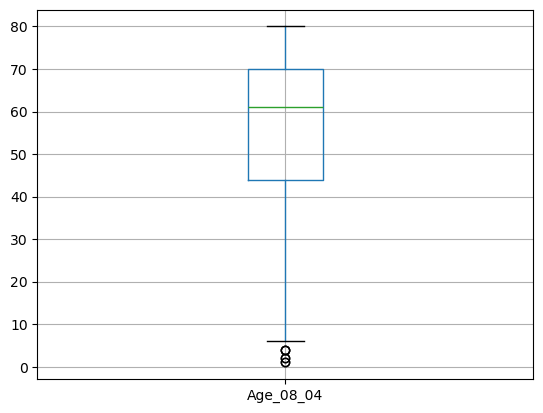

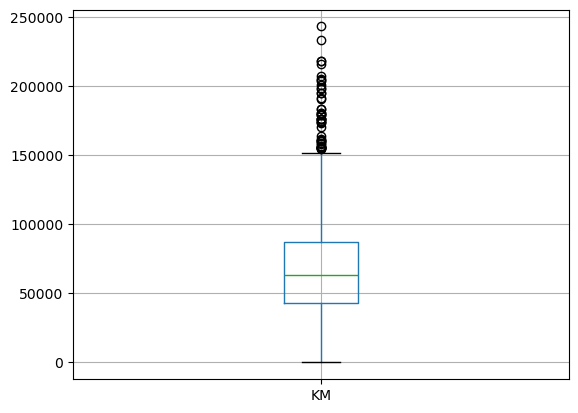

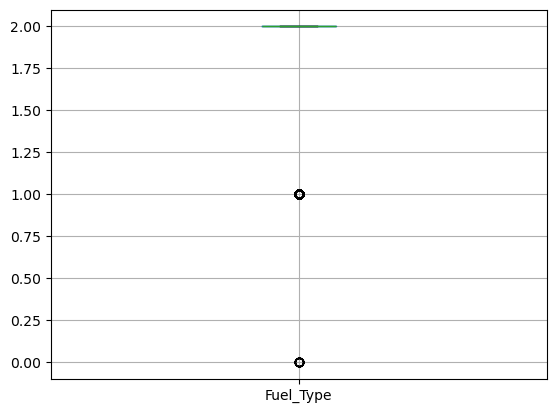

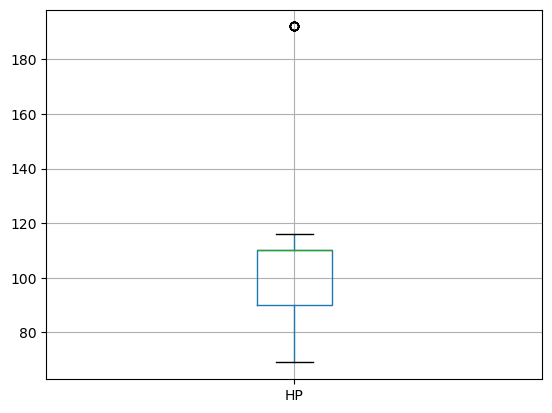

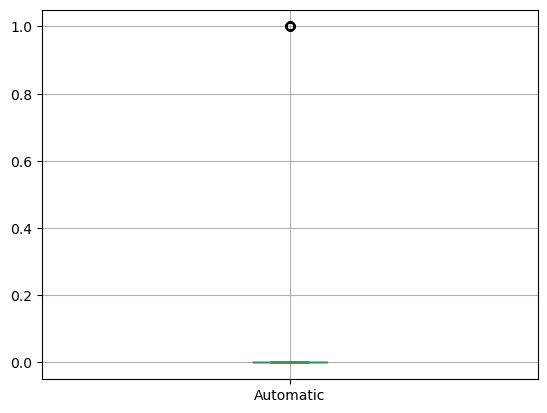

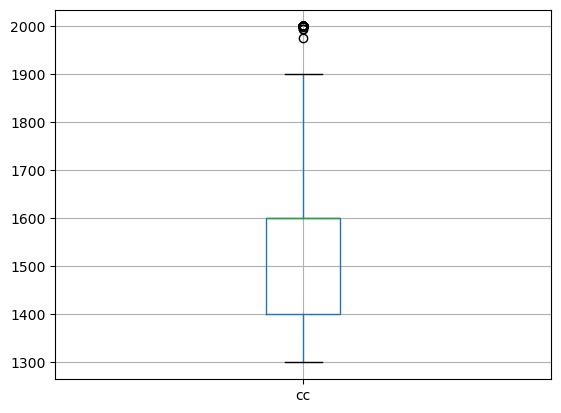

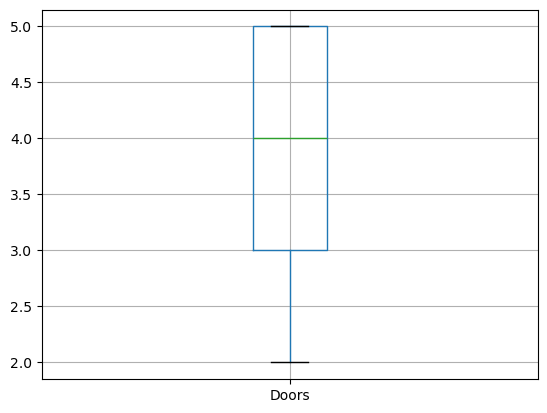

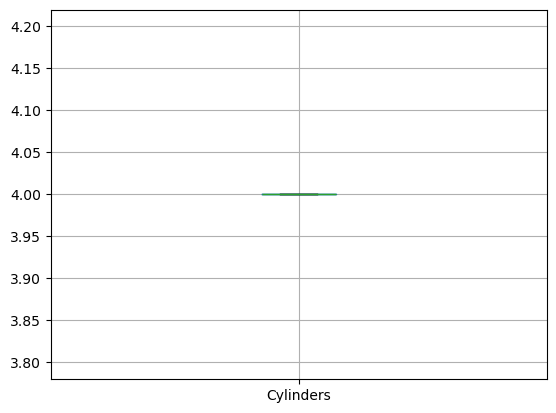

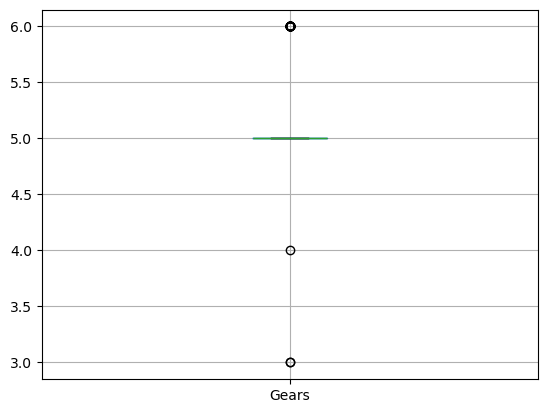

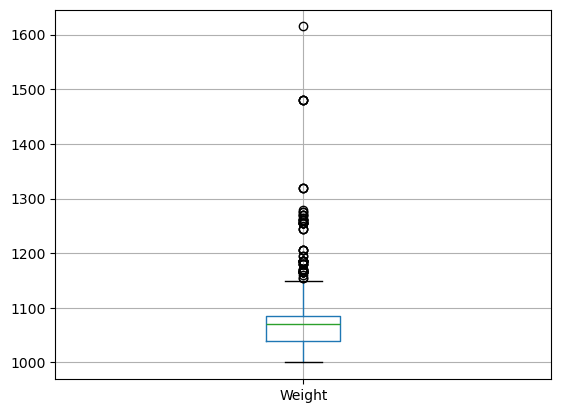

In [30]:
for column in x.columns:
    plt.figure()
    x.boxplot(column = column)
    plt.show()
    

# Model 1 

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [32]:
model.fit(x_train,y_train)

LinearRegression()

In [33]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [34]:
model1_coeff = pd.DataFrame(model.coef_)
model1_coeff.round(2)

,0
0,-2339.97
1,-585.64
2,48.99
3,439.55
4,90.77
5,-165.72
6,22.23
7,-0.00
8,145.16
9,1002.88


In [35]:
model.intercept_

10725.53829398207

In [36]:
from sklearn.metrics import r2_score
training_r2 = r2_score(y_train,y_pred_train)
training_r2

0.8624893127130071

In [37]:
from sklearn.metrics import r2_score
testing_r2 = r2_score(y_test,y_pred_test)
testing_r2

0.8701610978947354

In [38]:
from sklearn.metrics import mean_squared_error
training_mse = mean_squared_error(y_train,y_pred_train)
training_mse

1761098.9867784583

In [39]:
from sklearn.metrics import mean_squared_error
testing_mse = mean_squared_error(y_test,y_pred_test)
testing_mse

1792856.7210683736

In [40]:
import numpy as np
training_rmse = np.sqrt(training_mse)
testing_rmse = np.sqrt(testing_mse)

In [41]:
print(training_rmse,testing_rmse)

1327.064047730349 1338.9759971965045


In [42]:
from sklearn.metrics import mean_absolute_error
training_mae = mean_absolute_error(y_train,y_pred_train)
training_mae

969.2923492971036

In [43]:
from sklearn.metrics import mean_absolute_error
testing_mae = mean_absolute_error(y_test,y_pred_test)
testing_mae

994.1765788874

In [44]:
Model_1 = pd.Series([training_r2,testing_r2,training_mse,testing_mse,training_rmse,testing_rmse,
                     training_mae,testing_mae],index = ['training_r2', 'testing_r2', 'training_mse', 'testing_mse',
                                                        'training_rmse','testing_rmse', 'training_mae', 'testing_mae'])
print("Model 1 Metrics")
Model_1.round(3)

Model 1 Metrics


training_r2            0.862
testing_r2             0.870
training_mse     1761098.987
testing_mse      1792856.721
training_rmse       1327.064
testing_rmse        1338.976
training_mae         969.292
testing_mae          994.177
dtype: float64

# Model -2 Gradient Desent

# Model-3  Stats Model

In [45]:
df = df_1.copy()

In [46]:
df["Fuel_Type"]= labeling.fit_transform(df["Fuel_Type"])
df = scalling.fit_transform(df)
data = pd.DataFrame(df,columns=ToyotaCorolla.columns)
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,0.766449,-1.774222,-0.575732,-2.336909,-0.767465,-0.24137,2.314319,-1.084443,0.0,-0.140475,1.761938
1,0.835501,-1.774222,0.116580,-2.336909,-0.767465,-0.24137,2.314319,-1.084443,0.0,-0.140475,1.761938
2,0.890743,-1.720407,-0.716457,-2.336909,-0.767465,-0.24137,2.314319,-1.084443,0.0,-0.140475,1.761938
3,1.166951,-1.612776,-0.548681,-2.336909,-0.767465,-0.24137,2.314319,-1.084443,0.0,-0.140475,1.761938
4,0.835501,-1.397514,-0.802119,-2.336909,-0.767465,-0.24137,2.314319,-1.084443,0.0,-0.140475,1.857059
...,...,...,...,...,...,...,...,...,...,...,...
1430,-0.890796,0.701288,-1.281143,0.354475,-1.034499,-0.24137,-1.425389,-1.084443,0.0,-0.140475,-0.901458
1431,0.033118,0.862735,-1.322333,0.354475,-1.034499,-0.24137,-1.425389,-1.084443,0.0,-0.140475,-1.091701
1432,-0.614589,0.808919,-1.375261,0.354475,-1.034499,-0.24137,-1.425389,-1.084443,0.0,-0.140475,-1.091701
1433,-0.959848,0.755104,-1.377929,0.354475,-1.034499,-0.24137,-1.425389,-1.084443,0.0,-0.140475,-1.091701


In [47]:
import statsmodels.formula.api as sm
ols = sm.ols(formula = 'Price~Age_08_04+KM+Fuel_Type+HP+Automatic+cc+Doors+Cylinders+Gears+Weight',data = data).fit()
ols

In [48]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1025.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        16:05:11   Log-Likelihood:                -593.23
No. Observations:                1435   AIC:                             1206.
Df Residuals:                    1425   BIC:                             1259.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.819e-17      0.010   2.91e-15      1.000      -0.019       0.019
Age_08_04     -0.6308      0.013    -46.888      0.000      -0.657      -0.604
KM            -0.1701      0.014    -12.346      0.000      -0.197      -0.143
Fuel_Type      0.0274      0.017      1.644      0.100      -0.005       0.060
HP             0.1166      0.013      9.256      0.000       0.092       0.141
Automatic      0.0142      0.010      1.417      0.157      -0.005       0.034
cc            -0.0700      0.016     -4.300      0.000      -0.102      -0.038
Doors         -0.0101      0.011     -0.953      0.341      -0.031       0.011
Cylinders   1.967e-17    7.7e-19     25.557      0.000    1.82e-17    2.12e-17
Gears          0.0319      0.010      3.119      0.002       0.012       0.052
Weight         0.3303      0.016     20.386      0.000       0.299       0.362
==============================================================================
Omnibus:                      353.411   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4798.222
Skew:                          -0.753   Prob(JB):                         0.00
Kurtosis:                      11.831   Cond. No.                     3.71e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.56e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Regulization Technics 
### To select Best Feature = Lasso
### Give Importance to model as per future involement = Ridge

# Ridge

In [49]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [50]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=50)
RR = RR.fit(x_new,y)
RR

Ridge(alpha=50)

In [51]:
Ridge_coef = pd.DataFrame(RR.coef_)
Ridge_coef.rename(columns={0: 'Ridge_coef_a_1'}, inplace=True)
Ridge_coef


,Ridge_coef_a_1
0,-2195.387728
1,-663.491606
2,83.801816
3,411.026997
4,50.594973
5,-202.158947
6,-16.100436
7,0.000000
8,118.030975
9,1149.329058


In [52]:
model1_coeff.rename(columns={0: 'Model_1.coeff'}, inplace=True)
model1_coeff

,Model_1.coeff
0,-2.339972e+03
1,-5.856371e+02
2,4.898870e+01
3,4.395483e+02
4,9.077371e+01
5,-1.657161e+02
6,2.222684e+01
7,-8.526513e-14
8,1.451562e+02
9,1.002883e+03


In [53]:
df_coumn = pd.DataFrame(x_new.columns)
df_coumn.rename(columns={0: 'df_column'}, inplace=True)
df_coumn

,df_column
0,Age_08_04
1,KM
2,Fuel_Type
3,HP
4,Automatic
5,cc
6,Doors
7,Cylinders
8,Gears
9,Weight


In [54]:
pd.concat([df_coumn, model1_coeff, Ridge_coef],axis= 1).round(2)

,df_column,Model_1.coeff,Ridge_coef_a_1
0,Age_08_04,-2339.97,-2195.39
1,KM,-585.64,-663.49
2,Fuel_Type,48.99,83.80
3,HP,439.55,411.03
4,Automatic,90.77,50.59
5,cc,-165.72,-202.16
6,Doors,22.23,-16.10
7,Cylinders,-0.00,0.00
8,Gears,145.16,118.03
9,Weight,1002.88,1149.33


In [55]:
from sklearn.linear_model import Ridge
RR_2 = Ridge(alpha=60)
RR_2 = RR_2.fit(x_new,y)
RR_2

Ridge_coef_a_3 = pd.DataFrame(RR_2.coef_)
Ridge_coef_a_3.rename(columns={0: 'Ridge_coef_a_3'}, inplace=True)
Ridge_coef_a_3

pd.concat([df_coumn, model1_coeff, Ridge_coef,Ridge_coef_a_3],axis= 1).round(2)

,df_column,Model_1.coeff,Ridge_coef_a_1,Ridge_coef_a_3
0,Age_08_04,-2339.97,-2195.39,-2179.04
1,KM,-585.64,-663.49,-671.33
2,Fuel_Type,48.99,83.80,81.09
3,HP,439.55,411.03,409.18
4,Automatic,90.77,50.59,50.43
5,cc,-165.72,-202.16,-193.32
6,Doors,22.23,-16.10,-12.49
7,Cylinders,-0.00,0.00,0.00
8,Gears,145.16,118.03,118.35
9,Weight,1002.88,1149.33,1141.06


# Lasso

In [56]:
laso= Lasso(alpha=60)
laso = laso.fit(x_new,y)
laso

Lasso(alpha=60)

In [57]:
laso_coef_a_60 = pd.DataFrame(laso.coef_)
laso_coef_a_60.rename(columns={0: 'laso_coef_a_60'}, inplace=True)

In [58]:
pd.concat([df_coumn, model1_coeff, laso_coef_a_60],axis= 1).round(2)

,df_column,Model_1.coeff,laso_coef_a_60
0,Age_08_04,-2339.97,-2267.80
1,KM,-585.64,-648.09
2,Fuel_Type,48.99,57.26
3,HP,439.55,386.79
4,Automatic,90.77,8.48
5,cc,-165.72,-92.38
6,Doors,22.23,-0.00
7,Cylinders,-0.00,0.00
8,Gears,145.16,65.27
9,Weight,1002.88,1011.36


In [59]:
x_new.head(2)

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,-1.774222,-0.575732,-2.336909,-0.767465,-0.24137,2.314319,-1.084443,0.0,-0.140475,1.761938
1,-1.774222,0.116580,-2.336909,-0.767465,-0.24137,2.314319,-1.084443,0.0,-0.140475,1.761938


In [60]:
x_new_1 = x.drop(x.columns[[6,7]],axis = 1)
x_new.shape
LR = LinearRegression()

x_train,x_test, y_train, y_test = train_test_split(x_new_1,y, test_size=0.3, random_state=100)
LR.fit(x_train,y_train)
y_pred_train = LR.predict(x_train)
y_pred_test = LR.predict(x_test)
train_rmse=(np.sqrt(mean_squared_error(y_train, y_pred_train).round(2)))
test_rmse=(np.sqrt(mean_squared_error(y_test, y_pred_test).round(2)))
training_mae=(mean_absolute_error(y_train, y_pred_train).round(2))
testing_mae=(mean_absolute_error(y_test, y_pred_test).round(2))
training_r2=(r2_score(y_train, y_pred_train).round(2))
testing_r2=(r2_score(y_test, y_pred_test).round(2))


Model_2 = pd.Series([training_r2,testing_r2,training_mse,testing_mse,training_rmse,testing_rmse,
                  training_mae,testing_mae],index = ['training_r2', 'testing_r2', 'training_mse', 'testing_mse',
                                                      'training_rmse','testing_rmse', 'training_mae', 'testing_mae'])

print("Model_1")
print(Model_1.round(2))
print("============================")
print("Model_2")
print(Model_2.round(2))


Model_1
training_r2            0.86
testing_r2             0.87
training_mse     1761098.99
testing_mse      1792856.72
training_rmse       1327.06
testing_rmse        1338.98
training_mae         969.29
testing_mae          994.18
dtype: float64
Model_2
training_r2            0.86
testing_r2             0.87
training_mse     1761098.99
testing_mse      1792856.72
training_rmse       1327.06
testing_rmse        1338.98
training_mae         969.86
testing_mae          991.47
dtype: float64


In [61]:
x_new_1 = x.drop(x.columns[[6,7]],axis = 1)
x_new.shape

train_rmse = []
test_rmse = []
training_mae = []
testing_mae = []
training_r2 = []
testing_r2 = []
LR = LinearRegression()

for i in range(1,501,1):
    x_train,x_test, y_train, y_test = train_test_split(x_new_1,y, test_size=0.3, random_state=i)
    LR.fit(x_train,y_train)
    y_pred_train = LR.predict(x_train)
    y_pred_test = LR.predict(x_test)
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_pred_train).round(2)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_test).round(2)))
    training_mae.append(mean_absolute_error(y_train, y_pred_train).round(2))
    testing_mae.append(mean_absolute_error(y_test, y_pred_test).round(2))
    training_r2.append(r2_score(y_train, y_pred_train).round(2))
    testing_r2.append(r2_score(y_test, y_pred_test).round(2))
#========================================================================================
print("Cross Validation training rmse:", np.mean(train_rmse).round(2))
print("Cross Validation testing rmse:", np.mean(test_rmse).round(2))
print("variance : " , ((np.mean(train_rmse).round(2))-(np.mean(test_rmse).round(2))))
print("Cross Validation training_mae:", np.mean(training_mae).round(2))
print("Cross Validation testing_mae:", np.mean(testing_mae).round(2))
print("Cross Validation training_r2:", np.mean(training_r2).round(2))
print("Cross Validation testing_r2:", np.mean(testing_r2).round(2))

Cross Validation training rmse: 1315.25
Cross Validation testing rmse: 1371.18
variance :  -55.930000000000064
Cross Validation training_mae: 960.07
Cross Validation testing_mae: 976.42
Cross Validation training_r2: 0.87
Cross Validation testing_r2: 0.85


In [62]:
laso= Lasso(alpha=75)
laso = laso.fit(x_new,y)
laso
laso_coef_a_75 = pd.DataFrame(laso.coef_)
laso_coef_a_75.rename(columns={0: 'laso_coef_a_75'}, inplace=True)
pd.concat([df_coumn, model1_coeff, laso_coef_a_60,laso_coef_a_75],axis= 1).round(2)

,df_column,Model_1.coeff,laso_coef_a_60,laso_coef_a_75
0,Age_08_04,-2339.97,-2267.80,-2264.28
1,KM,-585.64,-648.09,-655.16
2,Fuel_Type,48.99,57.26,48.25
3,HP,439.55,386.79,378.49
4,Automatic,90.77,8.48,0.00
5,cc,-165.72,-92.38,-52.32
6,Doors,22.23,-0.00,-0.00
7,Cylinders,-0.00,0.00,0.00
8,Gears,145.16,65.27,51.18
9,Weight,1002.88,1011.36,968.61


In [63]:
x_new_2 = x.drop(x.columns[[4,6,7]],axis = 1)
x_new.shape
LR = LinearRegression()

x_train,x_test, y_train, y_test = train_test_split(x_new_2,y, test_size=0.3, random_state=100)
LR.fit(x_train,y_train)
y_pred_train = LR.predict(x_train)
y_pred_test = LR.predict(x_test)
train_rmse=(np.sqrt(mean_squared_error(y_train, y_pred_train).round(2)))
test_rmse=(np.sqrt(mean_squared_error(y_test, y_pred_test).round(2)))
training_mae=(mean_absolute_error(y_train, y_pred_train).round(2))
testing_mae=(mean_absolute_error(y_test, y_pred_test).round(2))
training_r2=(r2_score(y_train, y_pred_train).round(2))
testing_r2=(r2_score(y_test, y_pred_test).round(2))


Model_3 = pd.Series([training_r2,testing_r2,training_mse,testing_mse,training_rmse,testing_rmse,
                  training_mae,testing_mae],index = ['training_r2', 'testing_r2', 'training_mse', 'testing_mse',
                                                      'training_rmse','testing_rmse', 'training_mae', 'testing_mae'])

print("Model_1")
print(Model_1.round(2))
print("============================")
print("Model_2")
print(Model_2.round(2))
print("============================")
print("Model_3")
print(Model_3.round(2))


Model_1
training_r2            0.86
testing_r2             0.87
training_mse     1761098.99
testing_mse      1792856.72
training_rmse       1327.06
testing_rmse        1338.98
training_mae         969.29
testing_mae          994.18
dtype: float64
Model_2
training_r2            0.86
testing_r2             0.87
training_mse     1761098.99
testing_mse      1792856.72
training_rmse       1327.06
testing_rmse        1338.98
training_mae         969.86
testing_mae          991.47
dtype: float64
Model_3
training_r2            0.86
testing_r2             0.87
training_mse     1761098.99
testing_mse      1792856.72
training_rmse       1327.06
testing_rmse        1338.98
training_mae         973.57
testing_mae          989.34
dtype: float64


In [64]:
x_new_2 = x.drop(x.columns[[4,6,7]],axis = 1)
x_new.shape

train_rmse = []
test_rmse = []
training_mae = []
testing_mae = []
training_r2 = []
testing_r2 = []
LR = LinearRegression()

for i in range(1,501,1):
    x_train,x_test, y_train, y_test = train_test_split(x_new_2,y, test_size=0.3, random_state=i)
    LR.fit(x_train,y_train)
    y_pred_train = LR.predict(x_train)
    y_pred_test = LR.predict(x_test)
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_pred_train).round(2)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_test).round(2)))
    training_mae.append(mean_absolute_error(y_train, y_pred_train).round(2))
    testing_mae.append(mean_absolute_error(y_test, y_pred_test).round(2))
    training_r2.append(r2_score(y_train, y_pred_train).round(2))
    testing_r2.append(r2_score(y_test, y_pred_test).round(2))
#========================================================================================
print("Cross Validation training rmse:", np.mean(train_rmse).round(2))
print("Cross Validation testing rmse:", np.mean(test_rmse).round(2))
print("variance : " , ((np.mean(train_rmse).round(2))-(np.mean(test_rmse).round(2))))
print("Cross Validation training_mae:", np.mean(training_mae).round(2))
print("Cross Validation testing_mae:", np.mean(testing_mae).round(2))
print("Cross Validation training_r2:", np.mean(training_r2).round(2))
print("Cross Validation testing_r2:", np.mean(testing_r2).round(2))

Cross Validation training rmse: 1316.65
Cross Validation testing rmse: 1370.05
variance :  -53.399999999999864
Cross Validation training_mae: 961.67
Cross Validation testing_mae: 976.86
Cross Validation training_r2: 0.87
Cross Validation testing_r2: 0.85


In [65]:
laso= Lasso(alpha=95)
laso = laso.fit(x_new,y)
laso
laso_coef_a_85 = pd.DataFrame(laso.coef_)
laso_coef_a_85.rename(columns={0: 'laso_coef_a_85'}, inplace=True)
pd.concat([df_coumn, model1_coeff, laso_coef_a_60,laso_coef_a_75,laso_coef_a_85],axis= 1).round(2)

,df_column,Model_1.coeff,laso_coef_a_60,laso_coef_a_75,laso_coef_a_85
0,Age_08_04,-2339.97,-2267.80,-2264.28,-2261.13
1,KM,-585.64,-648.09,-655.16,-663.42
2,Fuel_Type,48.99,57.26,48.25,33.84
3,HP,439.55,386.79,378.49,368.41
4,Automatic,90.77,8.48,0.00,0.00
5,cc,-165.72,-92.38,-52.32,-0.00
6,Doors,22.23,-0.00,-0.00,0.00
7,Cylinders,-0.00,0.00,0.00,0.00
8,Gears,145.16,65.27,51.18,33.54
9,Weight,1002.88,1011.36,968.61,909.71


In [66]:
x_new_3 = x.drop(x.columns[[4,5,6,7]],axis = 1)
LR = LinearRegression()

x_train,x_test, y_train, y_test = train_test_split(x_new_3,y, test_size=0.3, random_state=100)
LR.fit(x_train,y_train)
y_pred_train = LR.predict(x_train)
y_pred_test = LR.predict(x_test)
train_rmse=(np.sqrt(mean_squared_error(y_train, y_pred_train).round(2)))
test_rmse=(np.sqrt(mean_squared_error(y_test, y_pred_test).round(2)))
training_mae=(mean_absolute_error(y_train, y_pred_train).round(2))
testing_mae=(mean_absolute_error(y_test, y_pred_test).round(2))
training_r2=(r2_score(y_train, y_pred_train).round(2))
testing_r2=(r2_score(y_test, y_pred_test).round(2))


Model_4 = pd.Series([training_r2,testing_r2,training_mse,testing_mse,training_rmse,testing_rmse,
                  training_mae,testing_mae],index = ['training_r2', 'testing_r2', 'training_mse', 'testing_mse',
                                                      'training_rmse','testing_rmse', 'training_mae', 'testing_mae'])

print("Model_1")
print(Model_1.round(2))
print("============================")
print("Model_2")
print(Model_2.round(2))
print("============================")
print("Model_3")
print(Model_3.round(2))
print("Model_4")
print(Model_4.round(2))


Model_1
training_r2            0.86
testing_r2             0.87
training_mse     1761098.99
testing_mse      1792856.72
training_rmse       1327.06
testing_rmse        1338.98
training_mae         969.29
testing_mae          994.18
dtype: float64
Model_2
training_r2            0.86
testing_r2             0.87
training_mse     1761098.99
testing_mse      1792856.72
training_rmse       1327.06
testing_rmse        1338.98
training_mae         969.86
testing_mae          991.47
dtype: float64
Model_3
training_r2            0.86
testing_r2             0.87
training_mse     1761098.99
testing_mse      1792856.72
training_rmse       1327.06
testing_rmse        1338.98
training_mae         973.57
testing_mae          989.34
dtype: float64
Model_4
training_r2            0.86
testing_r2             0.87
training_mse     1761098.99
testing_mse      1792856.72
training_rmse       1327.06
testing_rmse        1338.98
training_mae         989.48
testing_mae          995.50
dtype: float64


In [67]:
laso= Lasso(alpha=120)
laso = laso.fit(x_new,y)
laso
laso_coef_a_120 = pd.DataFrame(laso.coef_)
laso_coef_a_120.rename(columns={0: 'laso_coef_a_120'}, inplace=True)
pd.concat([df_coumn, model1_coeff, laso_coef_a_60,laso_coef_a_75,laso_coef_a_85,laso_coef_a_120],axis= 1).round(2)

,df_column,Model_1.coeff,laso_coef_a_60,laso_coef_a_75,laso_coef_a_85,laso_coef_a_120
0,Age_08_04,-2339.97,-2267.80,-2264.28,-2261.13,-2255.77
1,KM,-585.64,-648.09,-655.16,-663.42,-655.91
2,Fuel_Type,48.99,57.26,48.25,33.84,0.00
3,HP,439.55,386.79,378.49,368.41,368.69
4,Automatic,90.77,8.48,0.00,0.00,0.00
5,cc,-165.72,-92.38,-52.32,-0.00,-0.00
6,Doors,22.23,-0.00,-0.00,0.00,0.00
7,Cylinders,-0.00,0.00,0.00,0.00,0.00
8,Gears,145.16,65.27,51.18,33.54,11.57
9,Weight,1002.88,1011.36,968.61,909.71,870.72


In [68]:
x_new_4 = x.drop(x.columns[[2,4,5,6,7,]],axis = 1)
LR = LinearRegression()

x_train,x_test, y_train, y_test = train_test_split(x_new_4,y, test_size=0.3, random_state=100)
LR.fit(x_train,y_train)
y_pred_train = LR.predict(x_train)
y_pred_test = LR.predict(x_test)
train_rmse=(np.sqrt(mean_squared_error(y_train, y_pred_train).round(2)))
test_rmse=(np.sqrt(mean_squared_error(y_test, y_pred_test).round(2)))
training_mae=(mean_absolute_error(y_train, y_pred_train).round(2))
testing_mae=(mean_absolute_error(y_test, y_pred_test).round(2))
training_r2=(r2_score(y_train, y_pred_train).round(2))
testing_r2=(r2_score(y_test, y_pred_test).round(2))


Model_5 = pd.Series([training_r2,testing_r2,training_mse,testing_mse,training_rmse,testing_rmse,
                  training_mae,testing_mae],index = ['training_r2', 'testing_r2', 'training_mse', 'testing_mse',
                                                      'training_rmse','testing_rmse', 'training_mae', 'testing_mae'])

print("Model_1")
print(Model_1.round(2))
print("============================")
print("Model_2")
print(Model_2.round(2))
print("============================")
print("Model_3")
print(Model_3.round(2))
print("============================")
print("Model_4")
print(Model_4.round(2))
print("============================")
print("Model_5")
print(Model_5.round(2))


Model_1
training_r2            0.86
testing_r2             0.87
training_mse     1761098.99
testing_mse      1792856.72
training_rmse       1327.06
testing_rmse        1338.98
training_mae         969.29
testing_mae          994.18
dtype: float64
Model_2
training_r2            0.86
testing_r2             0.87
training_mse     1761098.99
testing_mse      1792856.72
training_rmse       1327.06
testing_rmse        1338.98
training_mae         969.86
testing_mae          991.47
dtype: float64
Model_3
training_r2            0.86
testing_r2             0.87
training_mse     1761098.99
testing_mse      1792856.72
training_rmse       1327.06
testing_rmse        1338.98
training_mae         973.57
testing_mae          989.34
dtype: float64
Model_4
training_r2            0.86
testing_r2             0.87
training_mse     1761098.99
testing_mse      1792856.72
training_rmse       1327.06
testing_rmse        1338.98
training_mae         989.48
testing_mae          995.50
dtype: float64
Model_5
trai

In [69]:
# sns.pairplot(x_new_4)

## Cooks Distance for levrage point and outlier 

In [70]:
data.shape

(1435, 11)

In [71]:
import statsmodels.formula.api as sm
model = sm.ols(formula = 'Price~Age_08_04+KM+HP+Gears+Weight',data = data).fit()

In [72]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1791.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        16:05:22   Log-Likelihood:                -613.15
No. Observations:                1435   AIC:                             1238.
Df Residuals:                    1429   BIC:                             1270.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.819e-17      0.010   2.87e-15      1.000      -0.019       0.019
Age_08_04     -0.6274      0.013    -46.739      0.000      -0.654      -0.601
KM            -0.2068      0.013    -16.523      0.000      -0.231      -0.182
HP             0.1170      0.011     10.881      0.000       0.096       0.138
Gears          0.0329      0.010      3.266      0.001       0.013       0.053
Weight         0.2690      0.012     23.130      0.000       0.246       0.292
==============================================================================
Omnibus:                      196.733   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1540.745
Skew:                          -0.370   Prob(JB):                         0.00
Kurtosis:                       8.022   Cond. No.                         2.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# # Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

Text(0.5, 1.0, 'Normal Q-Q plot of residuals')

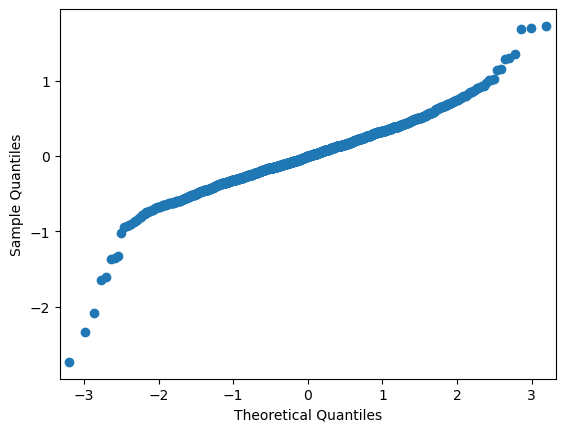

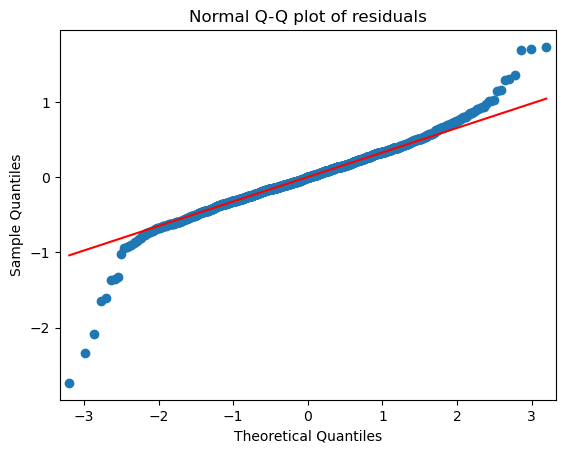

In [73]:
import statsmodels.formula.api as smf
import statsmodels.api as sm #for Q-Q plot function for error vs predicted
model = smf.ols('Price~Age_08_04+KM+HP+Gears+Weight',data=data).fit() #model.resid is error
sm.qqplot(model.resid);
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals") # points that are away from line are outliers
# Here some values are more than 10 y value

In [74]:
# get index for higher residuals
np.argmax(model.resid),np.max(model.resid)
# argmax() finds max error value and returns its index, max() will return max error


(146, 1.729446154705725)

# **2. Residual plot of Homoscedasticity**
Homoscedasticity can be checked by plotting a scatter plot between fitted (predicted) values and residuals

Text(0, 0.5, 'Errors')

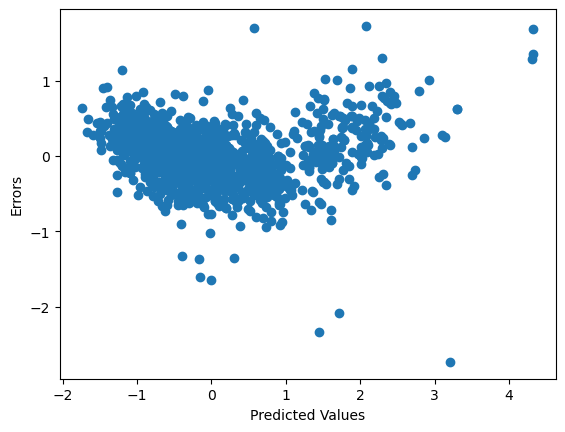

In [75]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Errors')
# pattern is there

# **3. Residual Vs. Regressor (x)**

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


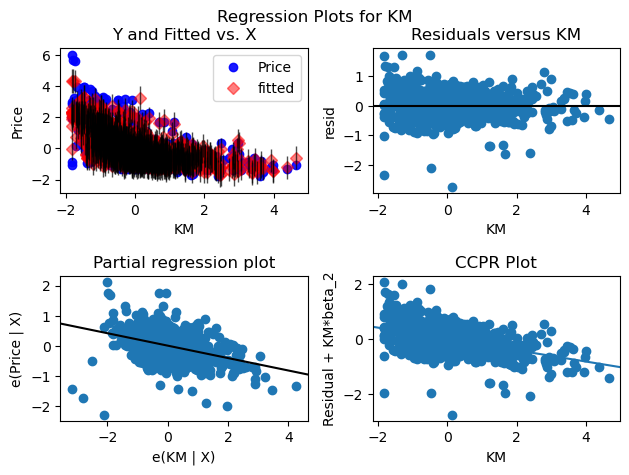

In [76]:
sm.graphics.plot_regress_exog(model,'KM');

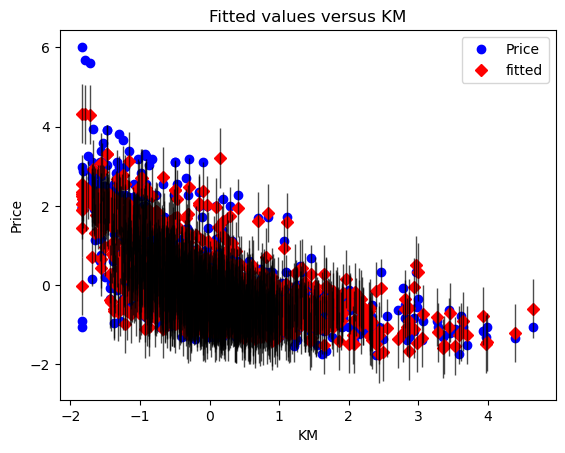

In [77]:
# to plot only 1st graph
sm.graphics.plot_fit(model,'KM');

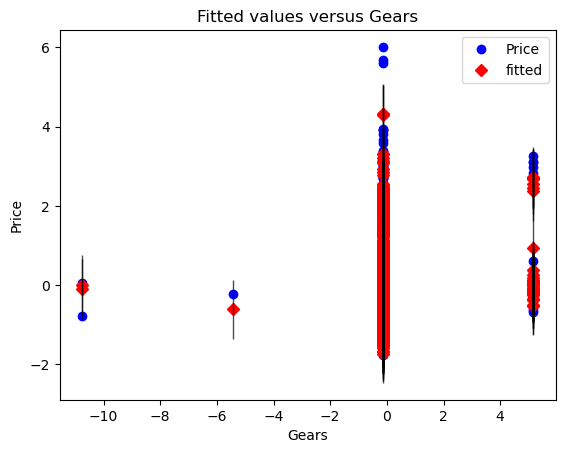

In [78]:
sm.graphics.plot_fit(model,'Gears');

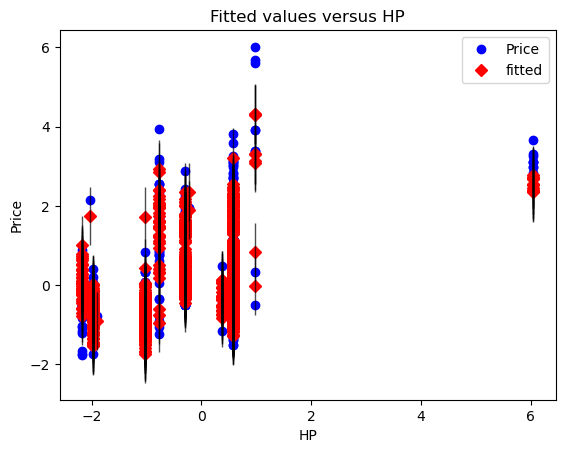

In [79]:
sm.graphics.plot_fit(model,'HP');

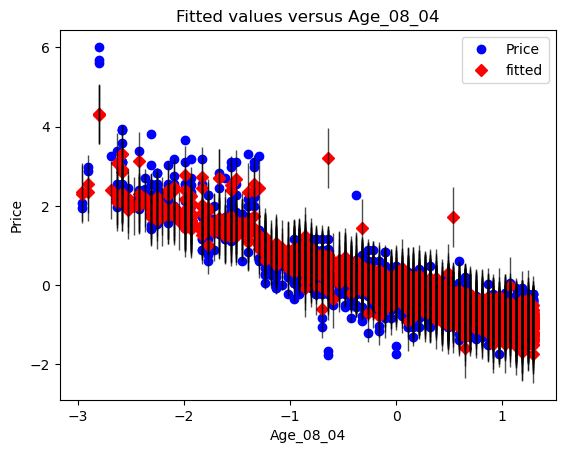

In [80]:
sm.graphics.plot_fit(model,'Age_08_04');

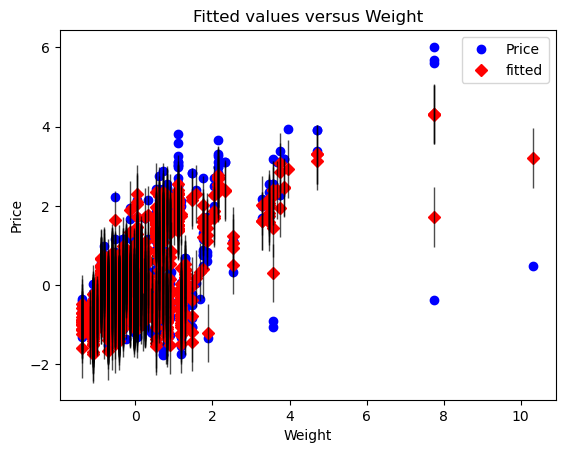

In [81]:
# SP
sm.graphics.plot_fit(model,'Weight');

# **MODEL DELETION TECHNIQUES**
Detecting influencers and outliers

In [82]:
model

In [83]:
# find the influence data
inf = model.get_influence() # in statsmodels get_inluence() will do the calculations

In [84]:
# calculate the cook's distance
c,p = inf.cooks_distance # returns 81 cook's distances and 81 p values. Only consider cook's distance

In [85]:
c

array([3.93427371e-03, 2.30718260e-03, 2.83625152e-03, ...,
       5.67816070e-06, 8.84091148e-04, 1.35609629e-02])

In [86]:
p

array([0.99999973, 0.99999994, 0.9999999 , ..., 1.        , 1.        ,
       0.99998907])

Text(0, 0.5, "Cook's Distance")

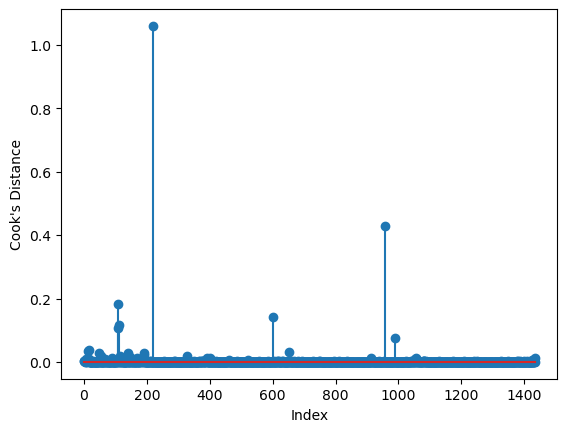

In [87]:
# Cook's distance plot
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')

In [88]:
np.argmax(c), np.max(c)

(220, 1.0596334935963658)

In [89]:
data.iloc[[220]]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
220,0.476431,-0.644098,0.149526,0.354475,0.567702,-0.24137,0.177343,1.015659,0.0,-0.140475,10.322855


In [90]:
# Influence Plot
from statsmodels.graphics.regressionplots import influence_plot

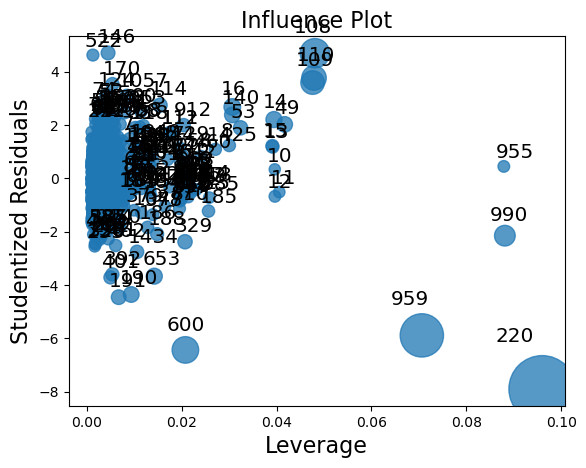

In [91]:
influence_plot(model);

In [92]:
# Calculate cutoff
k = len(data.columns) # 5
n = len(data) # 81

leverage = 3 * (k + 1) / n
leverage

0.025087108013937282

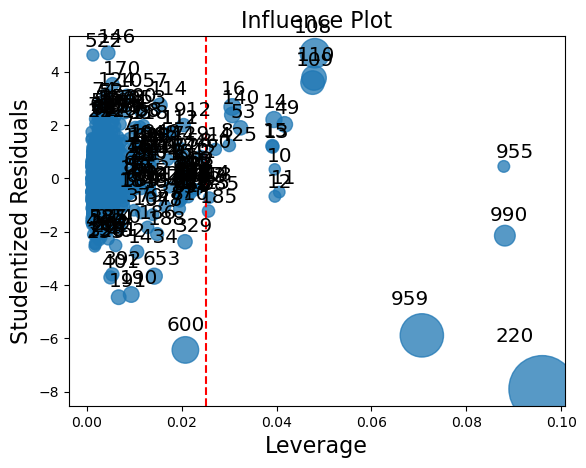

In [93]:
influence_plot(model)
plt.axvline(leverage, linestyle = '--', color = 'red')
# axvline: axis vertical line to draw a vertical line

In [94]:
from statsmodels.stats.outliers_influence import OLSInfluence
influence = OLSInfluence(model)
cook_d = influence.cooks_distance[0]
leverage_points = np.where(c > leverage)[0]
print(c)

cleaned_data = data.drop(leverage_points)
cleaned_data.reset_index(drop=True, inplace=True)
cleaned_data.head()

[3.93427371e-03 2.30718260e-03 2.83625152e-03 ... 5.67816070e-06
 8.84091148e-04 1.35609629e-02]


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,0.766449,-1.774222,-0.575732,-2.336909,-0.767465,-0.24137,2.314319,-1.084443,0.0,-0.140475,1.761938
1,0.835501,-1.774222,0.116580,-2.336909,-0.767465,-0.24137,2.314319,-1.084443,0.0,-0.140475,1.761938
2,0.890743,-1.720407,-0.716457,-2.336909,-0.767465,-0.24137,2.314319,-1.084443,0.0,-0.140475,1.761938
3,1.166951,-1.612776,-0.548681,-2.336909,-0.767465,-0.24137,2.314319,-1.084443,0.0,-0.140475,1.761938
4,0.835501,-1.397514,-0.802119,-2.336909,-0.767465,-0.24137,2.314319,-1.084443,0.0,-0.140475,1.857059


In [95]:
cleaned_data.shape

(1422, 11)

In [96]:
final_model = smf.ols('Price~Age_08_04+KM+HP+Gears+Weight', data=data).fit()

In [97]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1791.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        16:05:33   Log-Likelihood:                -613.15
No. Observations:                1435   AIC:                             1238.
Df Residuals:                    1429   BIC:                             1270.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.819e-17      0.010   2.87e-15      1.000      -0.019       0.019
Age_08_04     -0.6274      0.013    -46.739      0.000      -0.654      -0.601
KM            -0.2068      0.013    -16.523      0.000      -0.231      -0.182
HP             0.1170      0.011     10.881      0.000       0.096       0.138
Gears          0.0329      0.010      3.266      0.001       0.013       0.053
Weight         0.2690      0.012     23.130      0.000       0.246       0.292
==============================================================================
Omnibus:                      196.733   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1540.745
Skew:                          -0.370   Prob(JB):                         0.00
Kurtosis:                       8.022   Cond. No.                         2.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## My data is non linear 
# Final Model == Polynomial Regression

In [98]:
cleaned_data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,0.766449,-1.774222,-0.575732,-2.336909,-0.767465,-0.24137,2.314319,-1.084443,0.0,-0.140475,1.761938
1,0.835501,-1.774222,0.116580,-2.336909,-0.767465,-0.24137,2.314319,-1.084443,0.0,-0.140475,1.761938
2,0.890743,-1.720407,-0.716457,-2.336909,-0.767465,-0.24137,2.314319,-1.084443,0.0,-0.140475,1.761938
3,1.166951,-1.612776,-0.548681,-2.336909,-0.767465,-0.24137,2.314319,-1.084443,0.0,-0.140475,1.761938
4,0.835501,-1.397514,-0.802119,-2.336909,-0.767465,-0.24137,2.314319,-1.084443,0.0,-0.140475,1.857059


In [99]:
x = cleaned_data.drop(cleaned_data.columns[[0,2,4,5,6,7,]],axis = 1)
x.head()

,Age_08_04,Fuel_Type,Cylinders,Gears,Weight
0,-1.774222,-2.336909,0.0,-0.140475,1.761938
1,-1.774222,-2.336909,0.0,-0.140475,1.761938
2,-1.720407,-2.336909,0.0,-0.140475,1.761938
3,-1.612776,-2.336909,0.0,-0.140475,1.761938
4,-1.397514,-2.336909,0.0,-0.140475,1.857059


In [100]:
y = cleaned_data["Price"]
x.head()

,Age_08_04,Fuel_Type,Cylinders,Gears,Weight
0,-1.774222,-2.336909,0.0,-0.140475,1.761938
1,-1.774222,-2.336909,0.0,-0.140475,1.761938
2,-1.720407,-2.336909,0.0,-0.140475,1.761938
3,-1.612776,-2.336909,0.0,-0.140475,1.761938
4,-1.397514,-2.336909,0.0,-0.140475,1.857059


In [101]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=2)

In [102]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=100)
x_train_new= poly.fit_transform(x_train)

x_test_new= poly.fit_transform(x_test)


In [103]:
x_train_new.shape

(995, 21)

In [104]:
x_test_new.shape

(427, 21)

In [105]:
LR = LinearRegression()
LR.fit(x_train_new,y_train)
y_pred_train = LR.predict(x_train_new)
y_pred_test = LR.predict(x_test_new)

In [106]:
train_rmse=(np.sqrt(mean_squared_error(y_train, y_pred_train).round(2)))
test_rmse=(np.sqrt(mean_squared_error(y_test, y_pred_test).round(2)))
training_mae=(mean_absolute_error(y_train, y_pred_train).round(2))
testing_mae=(mean_absolute_error(y_test, y_pred_test).round(2))
training_r2=(r2_score(y_train, y_pred_train).round(2))
testing_r2=(r2_score(y_test, y_pred_test).round(2))
poly_reg = pd.Series([training_r2,testing_r2,training_mse,testing_mse,training_rmse,testing_rmse,
                  training_mae,testing_mae],index = ['training_r2', 'testing_r2', 'training_mse', 'testing_mse',
                                                      'training_rmse','testing_rmse', 'training_mae', 'testing_mae'])
poly_reg.round(2)

training_r2            0.89
testing_r2             0.88
training_mse     1761098.99
testing_mse      1792856.72
training_rmse       1327.06
testing_rmse        1338.98
training_mae           0.24
testing_mae            0.25
dtype: float64

In [107]:
residuals_train = y_train- y_pred_train

In [108]:
residuals_test = y_test- y_pred_test

## Moel Validation Plot 

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


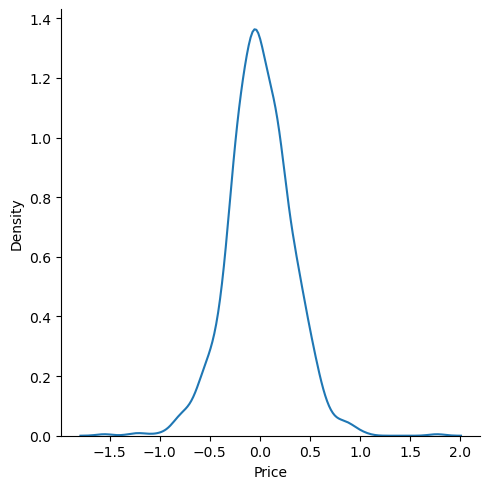

In [109]:
sns.displot(residuals_train, kind = 'kde')

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


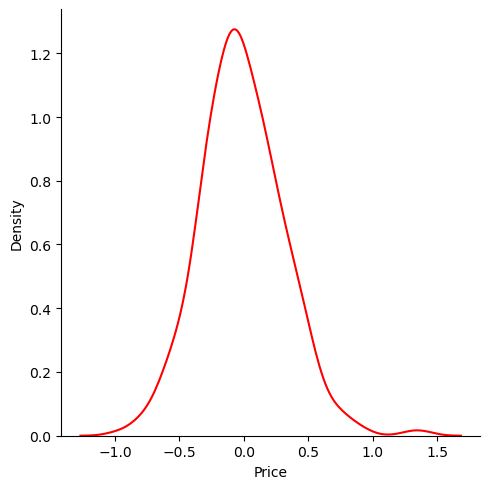

In [110]:
sns.displot(residuals_test, kind = 'kde',color ='red')

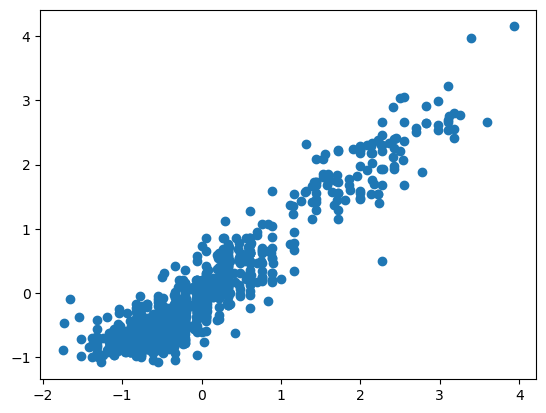

In [111]:
plt.scatter(y_train,y_pred_train)

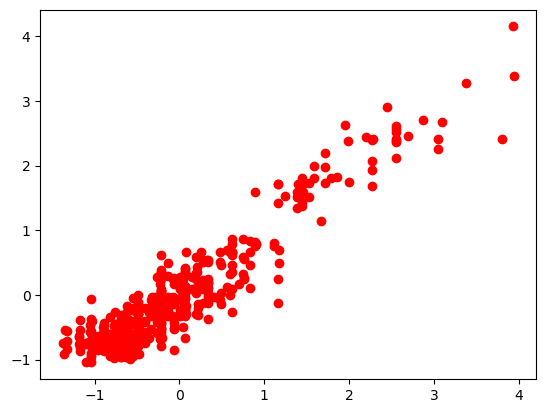

In [112]:
plt.scatter(y_test,y_pred_test,color = 'red')

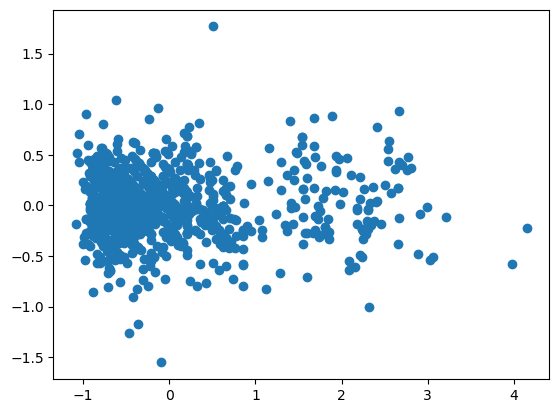

In [113]:
plt.scatter(y_pred_train,residuals_train)

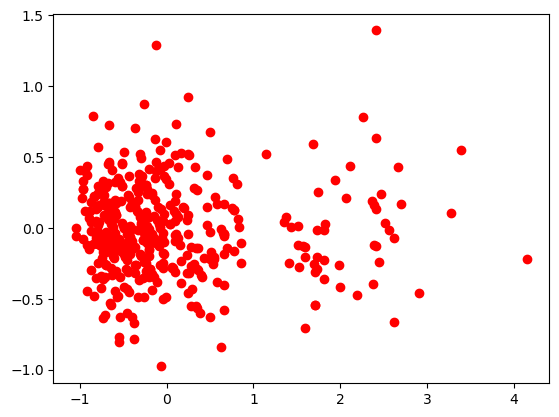

In [114]:
plt.scatter(y_pred_test,residuals_test,color = 'red')

# Cross Validation

In [115]:
from sklearn.model_selection import train_test_split, cross_val_score,KFold, LeaveOneOut  #KFold = classes 
from sklearn.linear_model import LogisticRegression  
kfold = KFold(n_splits= 10,shuffle=True,  random_state= 42)

In [120]:
kf_model = LinearRegression()
kf_model

LinearRegression()

In [121]:
a = np.array(x)
b = np.array(y)

In [122]:
results = cross_val_score(kf_model,x,y, cv =kfold)
results    # # 10 Accuracy becaus we have 10 blocks

array([0.81169828, 0.86090272, 0.86922044, 0.85552086, 0.85406943,
       0.89355382, 0.84803513, 0.84632196, 0.85260634, 0.8246138 ])

In [123]:
np.mean(results)

0.8516542785410788